In [496]:
import pandas as pd
df=pd.read_csv(r"E:\STIP TASKS\train.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [497]:
x=df.drop(["employee_id","gender"],axis=1)

In [498]:
import numpy as np
rep_nan=x.replace(" ",np.NaN)
rename=rep_nan.rename(columns={"region":"region_no"})

In [499]:
data1=rename.fillna(method="ffill")
data1

,department,region_no,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,sourcing,1,29,1.0,2,0,0,45,0


In [500]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1["department"]=le.fit_transform(data1["department"])
data1["region_no"]=le.fit_transform(data1["region_no"])

data1["education"]=le.fit_transform(data1["education"])
data1["recruitment_channel"]=le.fit_transform(data1["recruitment_channel"])

data1

,department,region_no,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,2,1,35,5.0,8,1,0,49,0
1,4,14,0,0,1,30,5.0,4,0,0,60,0
2,7,10,0,2,1,34,3.0,7,0,0,50,0
3,7,15,0,0,2,39,1.0,10,0,0,50,0
4,8,18,0,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,0,1,27,5.0,3,1,0,79,0
54806,7,33,0,2,1,29,1.0,2,0,0,45,0


In [501]:
g=data1.groupby("is_promoted")
print(len(g.get_group(1)))
print(len(g.get_group(0)))

4668
50140


In [502]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()


In [503]:
x_data=data1.iloc[:,0:11]
y_data=data1.iloc[:,11]

In [504]:
for i in x_data.columns:
    x_data[i]=scale.fit_transform(x_data[[i]])
x_data

,department,region_no,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0.808933,1.776526,1.572127,1.154111,-0.415276,0.025598,1.326042,0.500460,1.356878,-0.154018,-1.075931
1,-0.388183,-0.163034,-0.648080,-0.885239,-0.415276,-0.627135,1.326042,-0.437395,-0.736986,-0.154018,-0.253282
2,0.808933,-0.619401,-0.648080,1.154111,-0.415276,-0.104948,-0.261293,0.265996,-0.736986,-0.154018,-1.001145
3,0.808933,-0.048942,-0.648080,-0.885239,1.226063,0.547785,-1.848628,0.969387,-0.736986,-0.154018,-1.001145
4,1.207972,0.293333,-0.648080,-0.885239,-0.415276,1.331064,-0.261293,-0.906322,-0.736986,-0.154018,0.718939
...,...,...,...,...,...,...,...,...,...,...,...
54803,1.207972,-1.189860,-0.648080,1.154111,-0.415276,1.722704,-0.261293,2.610632,-0.736986,-0.154018,1.092871
54804,-0.388183,0.407425,1.572127,-0.885239,-0.415276,0.286691,-1.054960,0.031532,-0.736986,-0.154018,-0.552428
54805,-1.984338,-1.760319,-0.648080,-0.885239,-0.415276,-1.018775,1.326042,-0.671858,1.356878,-0.154018,1.167657
54806,0.808933,2.004710,-0.648080,1.154111,-0.415276,-0.757681,-1.848628,-0.906322,-0.736986,-0.154018,-1.375077


# LOGISTICREGRESSION

In [505]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.7)

In [506]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.feature_selection import RFE
rfe=RFE(LogisticRegression(),n_features_to_select=7)

In [507]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [508]:
lr.fit(x_train,y_train)
train_y_train=lr.predict(x_train)
test_y_test=lr.predict(x_test)
print("training_accuracy_before_f_selection:",accuracy_score(train_y_train,y_train))
print("testing_accuracy_before_f_selection:",accuracy_score(test_y_test,y_test))

training_accuracy_before_f_selection: 0.9172162126938616
testing_accuracy_before_f_selection: 0.9180806422185732


In [509]:
print(rfe.ranking_)
print(rfe.support_)
for i in zip(x_data.columns,rfe.ranking_,rfe.support_):
    print(i)

[1 4 3 5 1 1 1 2 1 1 1]
[ True False False False  True  True  True False  True  True  True]
('department', 1, True)
('region_no', 4, False)
('education', 3, False)
('recruitment_channel', 5, False)
('no_of_trainings', 1, True)
('age', 1, True)
('previous_year_rating', 1, True)
('length_of_service', 2, False)
('KPIs_met >80%', 1, True)
('awards_won?', 1, True)
('avg_training_score', 1, True)


In [510]:
import copy
dup_data=copy.deepcopy(x_data)
rfe_data=x_data.drop(['region_no','recruitment_channel','education',
                      'length_of_service'
                      ],axis=1)
rfe_data

,department,no_of_trainings,age,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score
0,0.808933,-0.415276,0.025598,1.326042,1.356878,-0.154018,-1.075931
1,-0.388183,-0.415276,-0.627135,1.326042,-0.736986,-0.154018,-0.253282
2,0.808933,-0.415276,-0.104948,-0.261293,-0.736986,-0.154018,-1.001145
3,0.808933,1.226063,0.547785,-1.848628,-0.736986,-0.154018,-1.001145
4,1.207972,-0.415276,1.331064,-0.261293,-0.736986,-0.154018,0.718939
...,...,...,...,...,...,...,...
54803,1.207972,-0.415276,1.722704,-0.261293,-0.736986,-0.154018,1.092871
54804,-0.388183,-0.415276,0.286691,-1.054960,-0.736986,-0.154018,-0.552428
54805,-1.984338,-0.415276,-1.018775,1.326042,1.356878,-0.154018,1.167657
54806,0.808933,-0.415276,-0.757681,-1.848628,-0.736986,-0.154018,-1.375077


In [511]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(rfe_data,y_data)

In [512]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [513]:
lr_training_y_train=lr.predict(x_train)
lr_testing_y_test=lr.predict(x_test)

In [514]:
from sklearn.metrics import *
print("training_accuracy_after_f_selection:",accuracy_score(lr_training_y_train,y_train))
print("tesing_accuracy_after_f_selection:",accuracy_score(lr_testing_y_test,y_test))

training_accuracy_after_f_selection: 0.915827373132876
tesing_accuracy_after_f_selection: 0.9198657130345935


In [515]:
#By the LogisticRegression 
#('department', 1, True)
#('age', 1, True)
#('previous_year_rating', 1, True)
#('length_of_service', 1, True)
#('KPIs_met >80%', 1, True)
#('awards_won?', 1, True)
#('avg_training_score', 1, True)

#These are the top 7 required features

# RANDOMFORESTCLASSIFIER

In [516]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,train_size=0.7)

In [517]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=15)
model.fit(x_train,y_train)
trainy_train=model.predict(x_train)
testy_test=model.predict(x_test)
print("training_acc_before_f_selection:",accuracy_score(trainy_train,y_train))
print("testing_acc_before_f_selection:",accuracy_score(testy_test,y_test))

training_acc_before_f_selection: 0.9956992050045614
testing_acc_before_f_selection: 0.9322508058140242


In [518]:
#overfitting is the problem in above case

In [519]:
from sklearn.feature_selection import RFE
rfe=RFE(RandomForestClassifier(n_estimators=15),n_features_to_select=7)
rfe.fit(x_train,y_train)
print(rfe.ranking_)
print(rfe.support_)
for i in zip(x_data.columns,rfe.ranking_,rfe.support_):
    print(i)

[1 1 5 2 4 1 1 1 1 3 1]
[ True  True False False False  True  True  True  True False  True]
('department', 1, True)
('region_no', 1, True)
('education', 5, False)
('recruitment_channel', 2, False)
('no_of_trainings', 4, False)
('age', 1, True)
('previous_year_rating', 1, True)
('length_of_service', 1, True)
('KPIs_met >80%', 1, True)
('awards_won?', 3, False)
('avg_training_score', 1, True)


In [520]:
import copy
random_data=copy.deepcopy(x_data)
random_rfe_data=random_data.drop(["education",
                                  'recruitment_channel',
                                  'no_of_trainings',
                                  'awards_won?'],axis=1)

In [521]:
x_train,x_test,y_train,y_test=train_test_split(random_rfe_data,y_data,train_size=0.7)

In [522]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [523]:
random_rfe_y_train=model.predict(x_train)
random_rfe_y_test=model.predict(x_test)
print("train_accuracy_after_feature_selection:",accuracy_score(random_rfe_y_train,y_train))
print("test_accuracy_after_f_selection:",accuracy_score(random_rfe_y_test,y_test))

train_accuracy_after_feature_selection: 0.9948390460054738
test_accuracy_after_f_selection: 0.9272638812868698


In [524]:
#overfitting problem appeared in the above case

In [525]:
from imblearn.over_sampling import RandomOverSampler

In [526]:
balance=RandomOverSampler()
x_train,y_train=balance.fit_resample(x_train,y_train)


In [527]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,train_size=0.7)

In [528]:
model.fit(x_train,y_train)
balance_y_train=model.predict(x_train)
balance_y_test=model.predict(x_test)
print("train_accuracy_after_balancing:",accuracy_score(balance_y_train,y_train))
print("test_accuracy_after_balancing:",accuracy_score(balance_y_test,y_test))

train_accuracy_after_balancing: 0.998575904300769
test_accuracy_after_balancing: 0.9747460362669704


In [529]:
#By the LogisticRegression 
#('department', 1, True)
#('age', 1, True)
#('previous_year_rating', 1, True)
#('length_of_service', 1, True)
#('KPIs_met >80%', 1, True)
#('awards_won?', 1, True)
#('avg_training_score', 1, True)

#These are the top 7 required features

In [530]:
#by randomforestClassifier
#('department', 1, True)
#('region_no', 1, True)
#('age', 1, True)
#('previous_year_rating', 1, True)
#('length_of_service', 1, True)
#('KPIs_met >80%', 1, True)
#('avg_training_score', 1, True)
#These are the top 7 required features

In [531]:
#by comparing the LogistcRegression and RandomForestClassifier algorithms
#below features are commonly required
#('department', 1, True)
#('previous_year_rating', 1, True)
#('length_of_service', 1, True)
#('KPIs_met >80%', 1, True)
#('avg_training_score', 1, True)
#('age', 1, True)

In [532]:
#Conclusion: as observed above 
# 6 common most important features are required in those algorithms
# ('region_no', 1, True) and ('awards_won?', 1, True) these two features
#  also important. but based on algorithm

# PARAMETRIC_TESTS

In [533]:
#chi-square Test, Z-test,F-test(ANOVA), p_value, 

In [534]:
print("Correlation:\n",(data1[["department",
              'previous_year_rating',
              "length_of_service",
             'KPIs_met >80%',
             "avg_training_score",
             "age"]].corr()))

Correlation:
                       department  previous_year_rating  length_of_service  \
department              1.000000             -0.132627           0.059060   
previous_year_rating   -0.132627              1.000000           0.000260   
length_of_service       0.059060              0.000260           1.000000   
KPIs_met >80%          -0.088209              0.326132          -0.077693   
avg_training_score     -0.251626              0.069003          -0.038122   
age                     0.079162              0.005443           0.657111   

                      KPIs_met >80%  avg_training_score       age  
department                -0.088209           -0.251626  0.079162  
previous_year_rating       0.326132            0.069003  0.005443  
length_of_service         -0.077693           -0.038122  0.657111  
KPIs_met >80%              1.000000            0.078391 -0.025592  
avg_training_score         0.078391            1.000000 -0.048380  
age                       -0.025592   

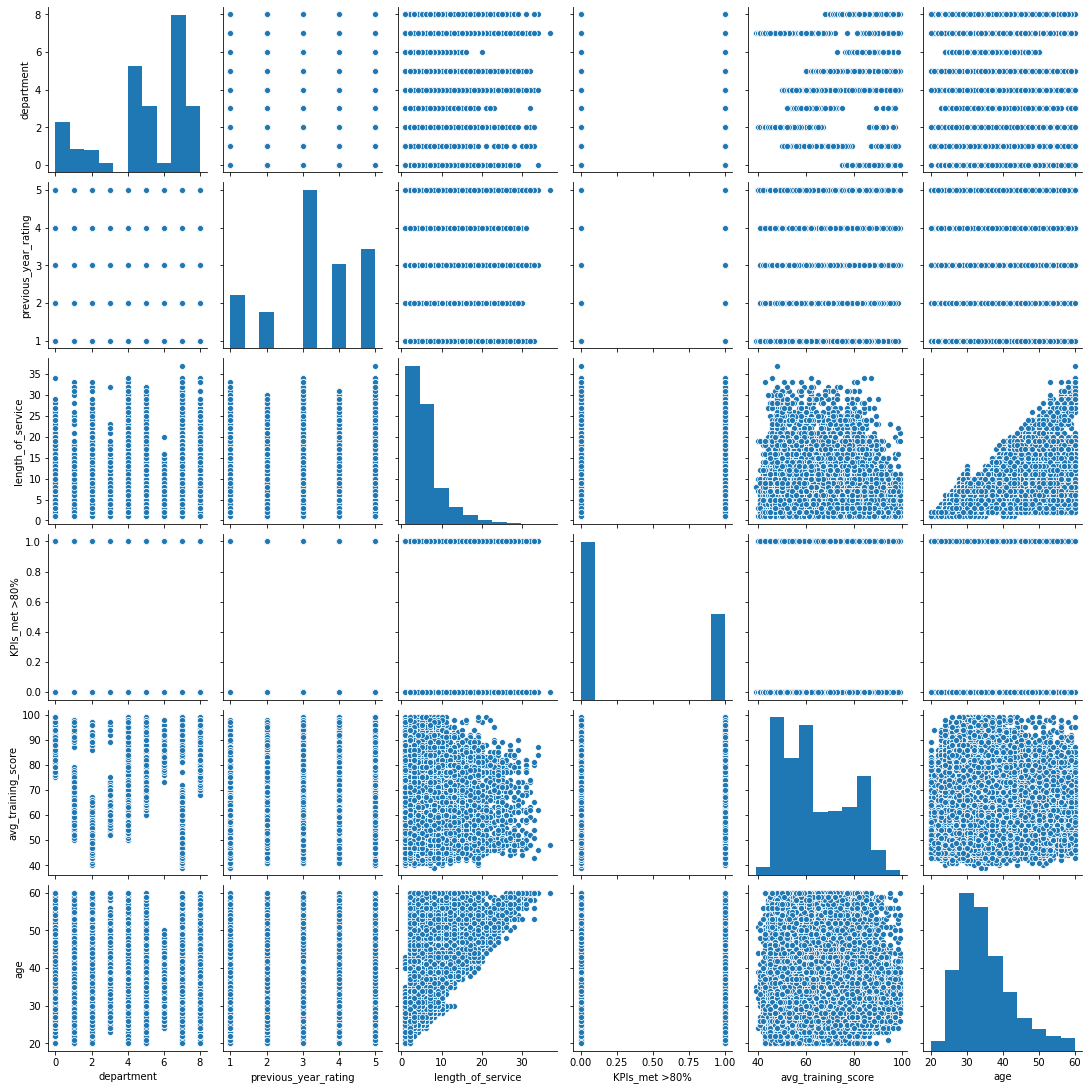

In [535]:
import seaborn as sns
sns.pairplot(data1[["department",
              'previous_year_rating',
              "length_of_service",
             'KPIs_met >80%',
             "avg_training_score",
             "age"]])

In [536]:
#age and length_of_service
from scipy.stats import stats
rel_look=pd.crosstab(data1["age"],data1['length_of_service'])
rel_look_tot=pd.crosstab(data1["age"],data1["length_of_service"])
rel_look

length_of_service,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,37
age,,,,,,,,,,,,,,,,,,,,,
20,55,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,49,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,121,109,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,252,173,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,412,351,77,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,430,528,254,76,7,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,532,662,497,260,92,15,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,746,670,587,511,223,72,15,3,0,0,...,0,0,0,0,0,0,0,0,0,0
28,754,738,490,539,373,180,50,14,7,2,...,0,0,0,0,0,0,0,0,0,0


In [537]:
observed_values=rel_look.values
print("observed_values:\n",observed_values)
len(rel_look.values[0])

observed_values:
 [[ 55  58   0 ...   0   0   0]
 [ 49  49   0 ...   0   0   0]
 [121 109   1 ...   0   0   0]
 ...
 [  0   6  11 ...   2   0   0]
 [  0   7   9 ...   0   0   0]
 [  0   3   8 ...   5   4   1]]


35

In [538]:
from scipy.stats import chi2_contingency
val=chi2_contingency(rel_look)

val

(68864.56632555401,
 0.0,
 1360,
 array([[9.37474456e+00, 1.37806890e+01, 1.45002372e+01, ...,
         1.85556853e-02, 8.24697125e-03, 2.06174281e-03],
        [8.13030944e+00, 1.19513940e+01, 1.25754269e+01, ...,
         1.60925412e-02, 7.15224055e-03, 1.78806014e-03],
        [1.91643008e+01, 2.81711429e+01, 2.96420778e+01, ...,
         3.79324186e-02, 1.68588527e-02, 4.21471318e-03],
        ...,
        [1.76709787e+01, 2.59759889e+01, 2.73323055e+01, ...,
         3.49766457e-02, 1.55451759e-02, 3.88629397e-03],
        [1.73391293e+01, 2.54881769e+01, 2.68190228e+01, ...,
         3.43198073e-02, 1.52532477e-02, 3.81331193e-03],
        [1.80028281e+01, 2.64638009e+01, 2.78455882e+01, ...,
         3.56334842e-02, 1.58371041e-02, 3.95927602e-03]]))

In [539]:
expected_valu=val[3]
expected_valu

array([[9.37474456e+00, 1.37806890e+01, 1.45002372e+01, ...,
        1.85556853e-02, 8.24697125e-03, 2.06174281e-03],
       [8.13030944e+00, 1.19513940e+01, 1.25754269e+01, ...,
        1.60925412e-02, 7.15224055e-03, 1.78806014e-03],
       [1.91643008e+01, 2.81711429e+01, 2.96420778e+01, ...,
        3.79324186e-02, 1.68588527e-02, 4.21471318e-03],
       ...,
       [1.76709787e+01, 2.59759889e+01, 2.73323055e+01, ...,
        3.49766457e-02, 1.55451759e-02, 3.88629397e-03],
       [1.73391293e+01, 2.54881769e+01, 2.68190228e+01, ...,
        3.43198073e-02, 1.52532477e-02, 3.81331193e-03],
       [1.80028281e+01, 2.64638009e+01, 2.78455882e+01, ...,
        3.56334842e-02, 1.58371041e-02, 3.95927602e-03]])

In [540]:
chi2=sum([(((exp_valu-observe_valu)**2)/exp_valu) for exp_valu,observe_valu in zip(expected_valu,observed_values)])
chi2_stats=sum(chi2)
chi2_stats

68864.56632555401

In [541]:
alpha=0.05
no_rows=len(rel_look.values)
no_cols=len(rel_look.values[0])
dof=((no_rows-1)*(no_cols-1))
print("degree of freedom:",dof)
from scipy.stats import chi2
critical_value=chi2.ppf(q=1-alpha,df=dof)
print("Critical_value:",critical_value)

degree of freedom: 1360
Critical_value: 1446.9069607989534


In [542]:
if chi2_stats>=critical_value:
    print("There is no relation")
    print("Null Hypothesis is accepted, and alternate hypothesis is accepted")
else:
    print("Null Hypothesis is rejected, and alternate Hypothesis is accepted")
    print("There is a relation")

There is no relation
Null Hypothesis is accepted, and alternate hypothesis is accepted


# P_value

In [543]:
from scipy.stats import chi2
p_value=1-chi2.cdf(x=chi2_stats,df=dof)

In [544]:
if p_value<=alpha:
    print("Null Hypothesis is accepted, and alternate hypothesis is rejected")
    print("There is no relation")
else:
    print("There is a relation")
    print("Null Hypothesis is rejected and alternate hypothesis is accepted")

Null Hypothesis is accepted, and alternate hypothesis is rejected
There is no relation
